# Análisis Exploratorio de Datos (EDA) del Servicio de Internet en Argentina

Este análisis exploratorio de datos (EDA) tiene como objetivo explorar y comprender los datos relacionados con los accesos a internet en Argentina, desglosados por diferentes características como velocidad, tecnología, penetración y más. Utilizaremos gráficos y técnicas estadísticas para identificar patrones, valores faltantes, valores atípicos y registros duplicados. 

## Contenido
1. Carga de Datos
2. Búsqueda de Valores Faltantes
3. Análisis de Valores Atípicos
4. Análisis de Registros Duplicados
5. Análisis Exploratorio Geoespacial
6. Análisis Exploratorio por Velocidad
7. Análisis Exploratorio por Tecnología
8. Análisis de Ingresos
9. Conclusiones


## 1. CARGA DE DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos del archivo Excel
file_path = '../Datasets/Internet.xlsx'
xls = pd.ExcelFile(file_path)

In [3]:
# Cargar todas las hojas en dataframes individuales
df_acc_vel_loc_sinrangos = pd.read_excel(xls, sheet_name='Acc_vel_loc_sinrangos')
df_velocidad_sin_rangos = pd.read_excel(xls, sheet_name='Velocidad_sin_Rangos')
df_velocidad_por_prov = pd.read_excel(xls, sheet_name='Velocidad % por prov')
df_totales_vmd = pd.read_excel(xls, sheet_name='Totales VMD')
df_accesos_tecnologia_localidad = pd.read_excel(xls, sheet_name='Accesos_tecnologia_localidad')
df_totales_accesos_por_tecnologia = pd.read_excel(xls, sheet_name='Totales Accesos Por Tecnología')
df_accesos_por_tecnologia = pd.read_excel(xls, sheet_name='Accesos Por Tecnología')
df_dial_baf = pd.read_excel(xls, sheet_name='Dial-BAf')
df_totales_dial_baf = pd.read_excel(xls, sheet_name='Totales Dial-BAf')
df_penetracion_poblacion = pd.read_excel(xls, sheet_name='Penetración-poblacion')
df_penetracion_hogares = pd.read_excel(xls, sheet_name='Penetracion-hogares')
df_penetracion_totales = pd.read_excel(xls, sheet_name='Penetracion-totales')
df_totales_accesos_por_velocidad = pd.read_excel(xls, sheet_name='Totales Accesos por velocidad')
df_accesos_por_velocidad = pd.read_excel(xls, sheet_name='Accesos por velocidad')
df_ingresos = pd.read_excel(xls, sheet_name='Ingresos')

print("Datos cargados exitosamente.")

Datos cargados exitosamente.


In [4]:
# Mostrar filas del DataFrame df_acc_vel_loc_sinrangos
df_acc_vel_loc_sinrangos

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
3062,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3063,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3064,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ANÁLISIS DEL DATAFRAME: df_acc_vel_loc_sinrangos 

- Contiene información detallada sobre la disponibilidad de diferentes velocidades de internet en varias localidades.
- Los valores numéricos en las columnas de velocidad de conexión indican la cantidad de accesos disponibles a esa velocidad en la localidad.
- Las celdas vacías indican que la velocidad correspondiente no está disponible en la localidad.

In [5]:
# Mostrar filas del DataFrame df_velocidad_sin_rangos
df_velocidad_sin_rangos

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2023.0,4.0,Buenos Aires,93351.0,19.0,0.0,0.0,26703.0,187.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023.0,4.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023.0,4.0,Catamarca,77.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023.0,4.0,Chaco,4040.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023.0,4.0,Chubut,16589.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,2017.0,4.0,Santa Fe,14119.0,0.0,0.0,0.0,3109.0,0.0,7637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,2017.0,4.0,Santiago Del Estero,0.0,0.0,0.0,0.0,41.0,0.0,909.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,2017.0,4.0,Tierra Del Fuego,0.0,0.0,0.0,0.0,6.0,0.0,282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,2017.0,4.0,Tucumán,0.0,0.0,0.0,0.0,105.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ANÁLISIS DEL DATAFRAME: df_velocidad_sin_rangos

- Contiene información sobre la disponibilidad de distintas velocidades de internet en diferentes provincias para periodos trimestrales desde el año 2017 al año 2023.
- Los valores numéricos en las columnas de velocidad de conexión indican la cantidad de accesos disponibles a esa velocidad en la provincia.
- Las celdas vacías indican que la velocidad correspondiente no está disponible en la provincia.

In [6]:
# Mostrar filas del DataFrame df_velocidad_por_prov
df_velocidad_por_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.490000
1,2023,4,Capital Federal,234.440000
2,2023,4,Catamarca,89.400000
3,2023,4,Chaco,107.140000
4,2023,4,Chubut,20.290000
...,...,...,...,...
955,2014,1,Santa Cruz,3.315991
956,2014,1,Santa Fe,3.147407
957,2014,1,Santiago Del Estero,2.949472
958,2014,1,Tierra Del Fuego,3.446888


ANÁLISIS DEL DATAFRAME: df_velocidad_por_prov

- Contiene información sobre la velocidad promedio de descarga de internet (en Mbps) para diferentes provincias de Argentina durante periodos trimestrales desde el año 2014 al año 2023.
- La columna "Mbps (Media de bajada)" indica la velocidad promedio de descarga de internet en cada provincia.
- Permite comparar la velocidad media de internet entre diferentes provincias y evaluar cuáles tienen mejores conexiones.

In [7]:
# Mostrar filas del DataFrame df_totales_vmd
df_totales_vmd

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2023,4,139.040000,Oct-Dic 2023
1,2023,3,129.670000,Jul-Sept 2023
2,2023,2,123.950000,Abr-Jun 2023
3,2023,1,110.500000,Ene-Mar 2023
4,2022,4,106.560000,Oct-Dic 2022
5,2022,3,62.460000,Jul-Sept 2022
6,2022,2,58.440000,Abr-Jun 2022
7,2022,1,55.110000,Ene-Mar 2022
8,2021,4,52.340000,Oct-Dic 2021
9,2021,3,48.460000,Jul-Sept 2021


ANÁLISIS DEL DATAFRAME: df_totales_vmd

- Contiene información sobre la velocidad media de descarga (VMD) en Mbps para cada trimestre desde el año 2014 al año 2023. Estos datos están desglosados por año y trimestre, proporcionando una visión temporal de la evolución de la velocidad media de descarga en Argentina.
- La velocidad media de descarga ha mostrado un aumento significativo a lo largo de los años. Por ejemplo, de 3,62 Mbps en el primer trimestre de 2014 a 139,04 Mbps en el cuarto trimestre de 2023.
- Hay una tendencia clara de mejora en la velocidad media de descarga a medida que avanzan los años, con incrementos notables en los valores de Mbps.

In [8]:
# Mostrar filas del DataFrame df_accesos_tecnologia_localidad
df_accesos_tecnologia_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7242,0,0,0,0,7242
3072,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3073,TUCUMAN,Trancas,Villa de Trancas,90112030,102,0,0,0,33,0,0,71,206
3074,TUCUMAN,Yerba Buena,Villa Carmela,90119020,831,0,0,0,1,0,0,79,911


ANÁLISIS DEL DATAFRAME: df_accesos_tecnologia_localidad

- Contiene información sobre los accesos a internet en diferentes localidades, desglosados por tipo de tecnología utilizada. Los tipos de tecnología incluyen ADSL, Cablemódem, Dial-up, Fibra Óptica, Satelital, WiMax, Wireless, y otros.
- Los valores en las columnas específicas de tecnología indican el número de accesos a internet en la localidad utilizando esa tecnología.
- Permite comparar el número de accesos a internet entre diferentes localidades y tecnologías.
- Proporciona una visión global del número total de accesos a internet en cada localidad, sumando todas las tecnologías.

In [9]:
# Mostrar filas del DataFrame df_totales_accesos_por_tecnologia
df_totales_accesos_por_tecnologia

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
1,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
2,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
3,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
4,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
5,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
6,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
7,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
8,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
9,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021


ANÁLISIS DEL DATAFRAME: df_totales_accesos_por_tecnologia

- Contiene información agregada sobre el número total de accesos a internet desglosados por tipo de tecnología utilizada, por trimestre y año desde el 2014 hasta el 2023. Incluye datos sobre diferentes tecnologías de acceso a internet y proporciona una visión temporal de la evolución de estos accesos.
- Los valores en cada columna de tecnología indican el número total de accesos a internet utilizando esa tecnología para el trimestre y año específicos.
- Permite comparar el número total de accesos entre diferentes tecnologías y ver la evolución a lo largo del tiempo.
- Permite analizar cómo ha cambiado el uso de diferentes tecnologías de acceso a internet a lo largo de los años.

In [10]:
# Mostrar filas del DataFrame df_accesos_por_tecnologia
df_accesos_por_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
959,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ANÁLISIS DEL DATAFRAME: df_accesos_por_tecnologia

- Contiene información detallada sobre el número de accesos a internet en diferentes provincias de Argentina, desglosados por tipo de tecnología utilizada. Los tipos de tecnología incluyen ADSL, Cablemódem, Fibra Óptica, Wireless, y otros.
- Los valores en las columnas de tecnología indican el número de accesos a internet en la provincia utilizando esa tecnología.
- Permite comparar el número de accesos entre diferentes provincias y tecnologías.
- Permite analizar cómo ha cambiado el uso de diferentes tecnologías de acceso a internet a lo largo del tiempo.

In [11]:
# Mostrar filas del DataFrame df_dial_baf
df_dial_baf

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2023,4,Buenos Aires,5005720,5900.0,5011620
1,2023,4,Capital Federal,1472317,2050.0,1474367
2,2023,4,Catamarca,74586,1.0,74587
3,2023,4,Chaco,147381,5.0,147386
4,2023,4,Chubut,169313,857.0,170170
...,...,...,...,...,...,...
955,2014,1,Santa Cruz,26304,460.0,26764
956,2014,1,Santa Fe,506000,612.0,506612
957,2014,1,Santiago Del Estero,37124,9.0,37133
958,2014,1,Tierra Del Fuego,27272,766.0,28038


ANÁLISIS DEL DATAFRAME: df_dial_baf 

- Contiene información sobre el número de accesos a internet desglosados por banda ancha fija y Dial-Up en diferentes provincias de Argentina. Los datos están organizados por año y trimestre.
- Los valores en las columnas de "Banda Ancha Fija" y "Dial-Up" indican el número de accesos a internet en la provincia utilizando esas tecnologías.
- Permite comparar el número de accesos entre diferentes provincias y tecnologías.
- Permite analizar cómo ha cambiado el uso de diferentes tecnologías de acceso a internet a lo largo del tiempo.

In [12]:
# Mostrar filas del DataFrame df_totales_dial_baf
df_totales_dial_baf

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2023,4,11535868,11793,11547661,Oct-Dic 2023
1,2023,3,11395115,11793,11406908,Jul-Sept 2023
2,2023,2,11239781,12116,11251897,Abr-Jun 2023
3,2023,1,11229459,12436,11241895,Ene-Mar 2023
4,2022,4,11195668,12446,11208114,Oct-Dic 2022
5,2022,3,11078691,12437,11091128,Jul-Sept 2022
6,2022,2,10946248,12436,10958684,Abr-Jun 2022
7,2022,1,10611390,12619,10624009,Ene-Mar 2022
8,2021,4,10476933,12861,10489794,Oct-Dic 2021
9,2021,3,10075184,10357,10085541,Jul-Sept 2021


ANÁLISIS DEL DATAFRAME: df_totales_dial_baf

- Contiene información agregada sobre el número total de accesos a internet utilizando tecnología Dial-Up y Banda Ancha Fija, desglosados por trimestre y año.
- Los valores en las columnas "Banda Ancha Fija" y "Dial-Up" indican el número total de accesos a internet utilizando esas tecnologías para el trimestre y año.
- Permite comparar el número total de accesos entre diferentes trimestres y años.
- Permite analizar cómo ha cambiado el uso de diferentes tecnologías de acceso a internet a lo largo del tiempo.

In [13]:
# Mostrar filas del DataFrame df_penetracion_poblacion
df_penetracion_poblacion

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.680000
1,2023,4,Capital Federal,47.800000
2,2023,4,Catamarca,17.460000
3,2023,4,Chaco,11.850000
4,2023,4,Chubut,26.040000
...,...,...,...,...
955,2014,1,Santa Cruz,8.677327
956,2014,1,Santa Fe,15.077801
957,2014,1,Santiago Del Estero,4.058899
958,2014,1,Tierra Del Fuego,19.104921


ANÁLISIS DEL DATAFRAME: df_penetracion_poblacion

- Contiene información sobre la penetración del acceso a internet en la población de diferentes provincias de Argentina para diferentes trimestres desde el año 2014 al año 2023. Los datos muestran el número de accesos a internet por cada 100 habitantes en cada provincia.
- Los valores en la columna "Accesos por cada 100 hab" indican la cantidad de accesos a internet por cada 100 habitantes en la provincia.
- Permite comparar la penetración del acceso a internet entre diferentes provincias.

In [14]:
# Mostrar filas del DataFrame df_penetracion_hogares
df_penetracion_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.960000
1,2023,4,Capital Federal,117.020000
2,2023,4,Catamarca,68.630000
3,2023,4,Chaco,44.350000
4,2023,4,Chubut,84.960000
...,...,...,...,...
955,2014,1,Santa Cruz,28.939093
956,2014,1,Santa Fe,47.847663
957,2014,1,Santiago Del Estero,16.309924
958,2014,1,Tierra Del Fuego,63.965926


ANÁLISIS DEL DATAFRAME: df_penetracion_hogares

- Contiene información sobre la penetración del acceso a internet en los hogares de diferentes provincias de Argentina para diferentes trimestre desde el año 2014 hasta el año 2023. Los datos muestran el número de accesos a internet por cada 100 hogares en cada provincia.
- Los valores en la columna "Accesos por cada 100 hogares" indican la cantidad de accesos a internet por cada 100 hogares en la provincia.
- Permite comparar la penetración del acceso a internet en hogares entre diferentes provincias.

In [15]:
# Mostrar filas del DataFrame df_penetracion_totales
df_penetracion_totales

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,78.560000,24.660000,Oct-Dic 2023
1,2023,3,77.840000,24.410000,Jul-Sept 2023
2,2023,2,77.020000,24.140000,Abr-Jun 2023
3,2023,1,77.200000,24.170000,Ene-Mar 2023
4,2022,4,77.210000,24.150000,Oct-Dic 2022
5,2022,3,76.640000,23.950000,Jul-Sept 2022
6,2022,2,75.965424,23.720442,Abr-Jun 2022
7,2022,1,73.878803,23.049171,Ene-Mar 2022
8,2021,4,73.176397,22.810702,Oct-Dic 2021
9,2021,3,70.578853,21.982550,Jul-Sept 2021


ANÁLISIS DEL DATAFRAME: df_penetracion_totales

- Contiene información sobre la penetración del acceso a internet en los hogares y la población a nivel nacional para periodos trimestrales desde el año 2014 hasta el año 2023. Los datos muestran el número de accesos a internet por cada 100 hogares y por cada 100 habitantes en cada periodo.
- Los valores en las columnas "Accesos por cada 100 hogares" y "Accesos por cada 100 habitantes" indican la cantidad de accesos a internet por cada 100 hogares y por cada 100 habitantes en el periodo especificado.
- Permite comparar la penetración del acceso a internet entre diferentes trimestres y años.
- Se observa un aumento continuo en la penetración del acceso a internet tanto en hogares como en habitantes desde 2014 hasta 2023.

In [16]:
# Mostrar filas del DataFrame df_totales_accesos_por_velocidad
df_totales_accesos_por_velocidad

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
1,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
2,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
3,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895
4,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
5,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
6,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
7,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
8,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
9,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541


ANÁLISIS DEL DATAFRAME: df_totales_accesos_por_velocidad 

- Contiene información sobre el número total de accesos a internet desglosados por diferentes rangos de velocidad para varios trimestres y años. Esta información muestra cómo se distribuyen los accesos a internet en términos de velocidad de conexión.
- Los valores en las columnas de velocidad indican el número de accesos a internet en cada rango de velocidad para el trimestre y año especificado.
- Permite comparar el número de accesos entre diferentes rangos de velocidad.
- Permite analizar cómo ha cambiado el uso de diferentes velocidades de acceso a internet a lo largo del tiempo.

In [17]:
# Mostrar filas del DataFrame df_accesos_por_velocidad
df_accesos_por_velocidad

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
956,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
957,2014,1,Santiago Del Estero,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
958,2014,1,Tierra Del Fuego,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


ANÁLISIS DEL DATAFRAME: df_accesos_por_velocidad

- Contiene información detallada sobre el número de accesos a internet desglosados por diferentes rangos de velocidad y clasificados por provincia. Los datos muestran la distribución de los accesos a internet en función de la velocidad de conexión.
- Los valores en las columnas de velocidad indican el número de accesos a internet en cada rango de velocidad para la provincia especificada.
- Permite comparar el número de accesos entre diferentes provincias y rangos de velocidad.

In [18]:
# Mostrar filas del DataFrame df_ingresos
df_ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022
5,2022,3,6.408678e+07,Jul-Sept 2022
6,2022,2,6.041950e+07,Abr-Jun 2022
7,2022,1,5.521931e+07,Ene-Mar 2022
8,2021,4,4.546789e+07,Oct-Dic 2021
9,2021,3,4.299994e+07,Jul-Sept 2021


ANÁLISIS DEL DATAFRAME: df_ingresos

- Contiene información sobre los ingresos generados por los servicios de acceso a internet, desglosados por trimestre y año desde el 2014 hasta el 2023. Estos datos muestran el rendimiento financiero del servicio de internet en diferentes periodos.
- Los valores en la columna "Ingresos (miles de pesos)" indican los ingresos generados por los servicios de acceso a internet en el trimestre y año especificado.
- Permite comparar los ingresos generados por el servicio de internet entre diferentes trimestres y años.
- Se observa un aumento continuo en los ingresos generados por el servicio de internet desde 2014 hasta 2023.


## 2. BUSQUEDA DE VALORES FALTANTES

In [19]:
# Función para buscar valores faltantes en un dataframe
def buscar_valores_faltantes(df, nombre_df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print(f"Valores faltantes en {nombre_df}:")
    print(missing)
    print("\n")

# Buscar valores faltantes en todos los dataframes
dataframes = {
    "Acc_vel_loc_sinrangos": df_acc_vel_loc_sinrangos,
    "Velocidad_sin_Rangos": df_velocidad_sin_rangos,
    "Velocidad % por prov": df_velocidad_por_prov,
    "Totales VMD": df_totales_vmd,
    "Accesos_tecnologia_localidad": df_accesos_tecnologia_localidad,
    "Totales Accesos Por Tecnologia": df_totales_accesos_por_tecnologia,
    "Accesos Por Tecnología": df_accesos_por_tecnologia,
    "Dial-BAf": df_dial_baf,
    "Totales Dial-BAf": df_totales_dial_baf,
    "Penetración-poblacion": df_penetracion_poblacion,
    "Penetracion-hogares": df_penetracion_hogares,
    "Penetracion-totales": df_penetracion_totales,
    "Totales Accesos por velocidad": df_totales_accesos_por_velocidad,
    "Accesos por velocidad": df_accesos_por_velocidad,
    "Ingresos": df_ingresos
}

for nombre_df, df in dataframes.items():
    buscar_valores_faltantes(df, nombre_df)

Valores faltantes en Acc_vel_loc_sinrangos:
Otros         2189
0,256 Mbps    3029
0,5 Mbps      2424
0,512 Mbps    2540
0,75 Mbps     2782
              ... 
850 Mbps      3065
900 Mbps      3065
999 Mbps      3049
1000 Mbps     2648
1024 Mbps     3065
Length: 132, dtype: int64


Valores faltantes en Velocidad_sin_Rangos:
Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
5125 Mbps     1
6000 Mbps     1
7000 Mbps     1
8000 Mbps     1
10000 Mbps    1
Length: 192, dtype: int64


Valores faltantes en Velocidad % por prov:
Series([], dtype: int64)


Valores faltantes en Totales VMD:
Series([], dtype: int64)


Valores faltantes en Accesos_tecnologia_localidad:
Series([], dtype: int64)


Valores faltantes en Totales Accesos Por Tecnologia:
Series([], dtype: int64)


Valores faltantes en Accesos Por Tecnología:
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros       

In [20]:
# Rellenar valores faltantes con cero
for nombre_df, df in dataframes.items():
    dataframes[nombre_df] = df.fillna(0)

## 3. ANALISIS DE VALORES ATIPICOS

Valores atípicos en Acc_vel_loc_sinrangos:


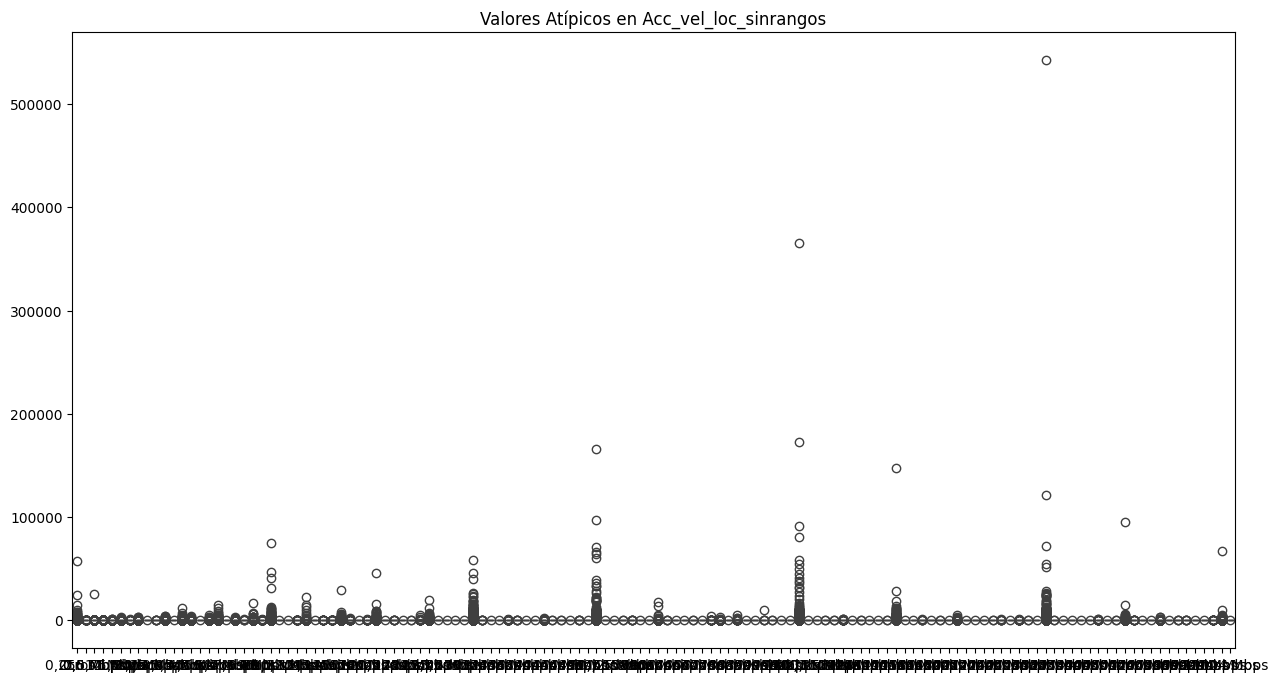

Valores atípicos en Velocidad_sin_Rangos:


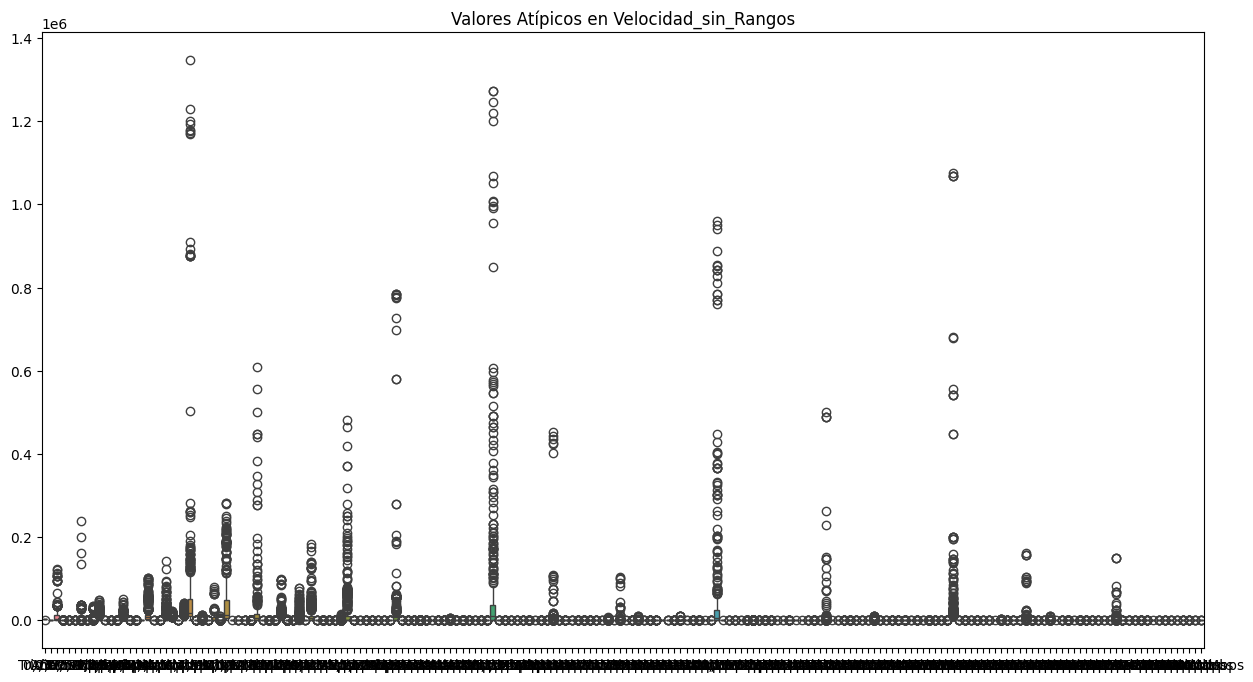

Valores atípicos en Velocidad % por prov:


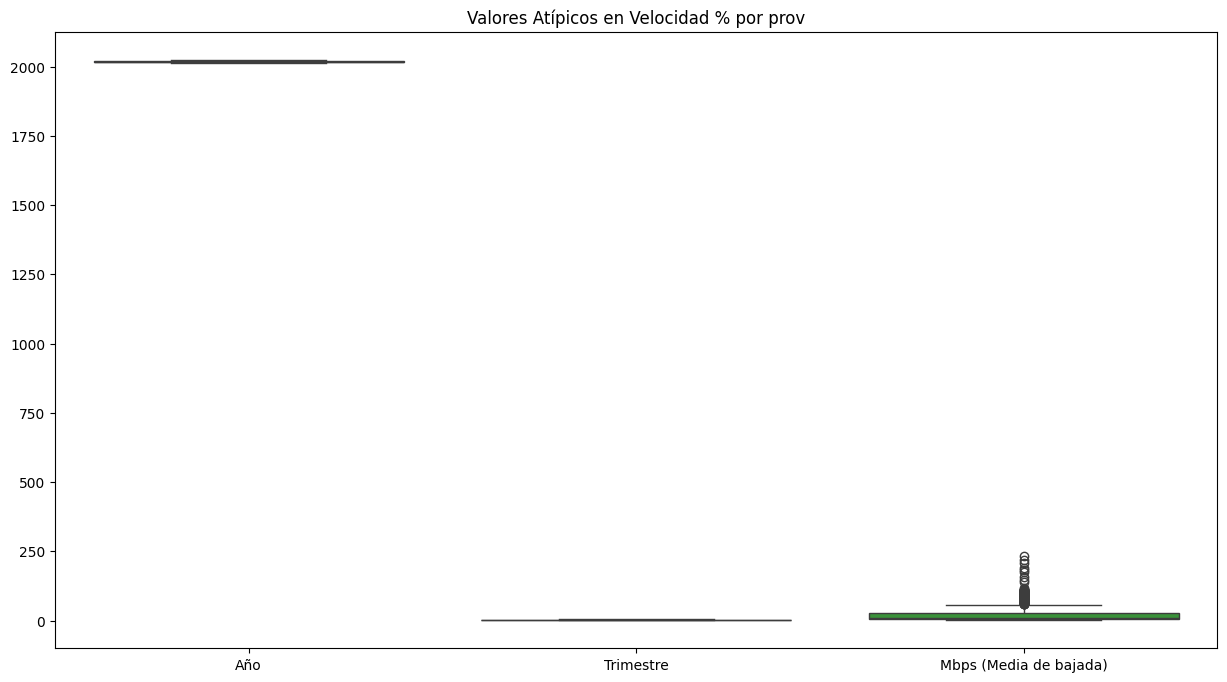

Valores atípicos en Totales VMD:


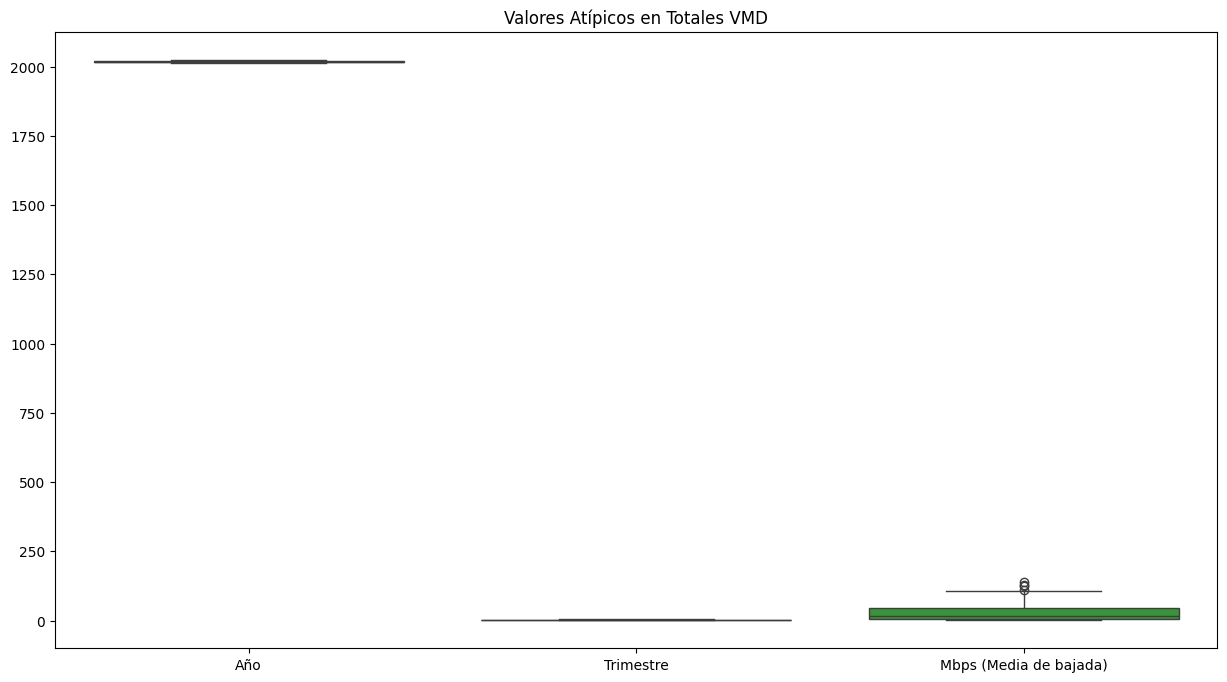

Valores atípicos en Accesos_tecnologia_localidad:


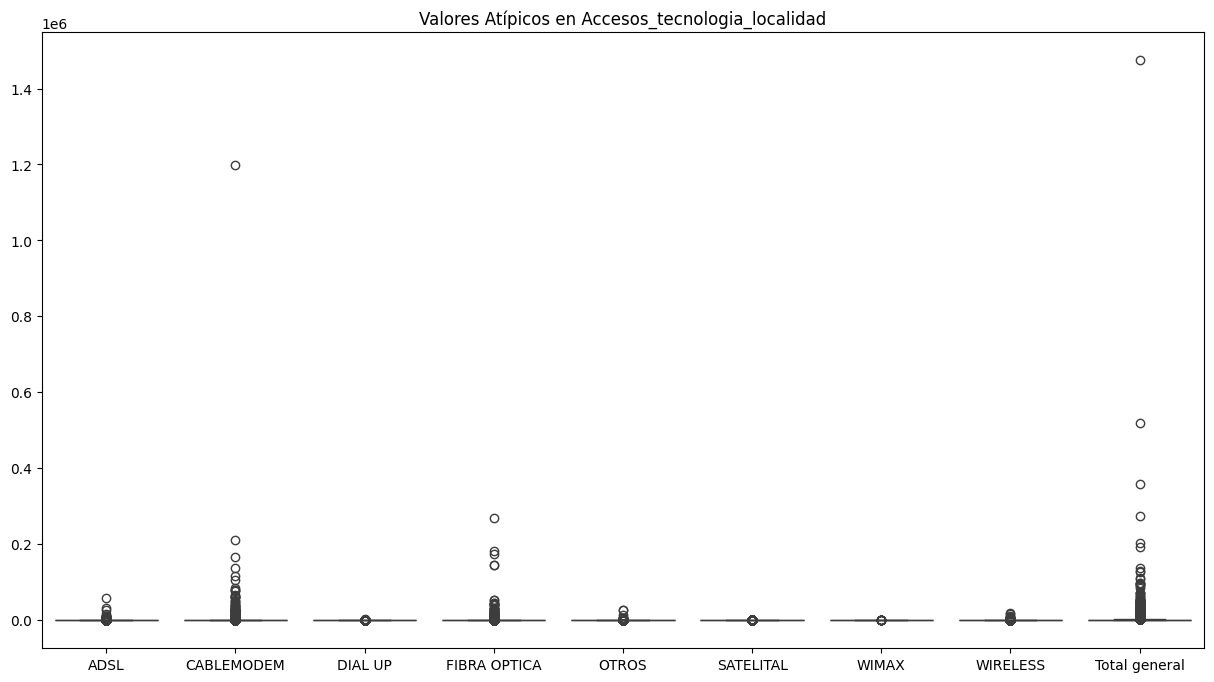

Valores atípicos en Totales Accesos Por Tecnologia:


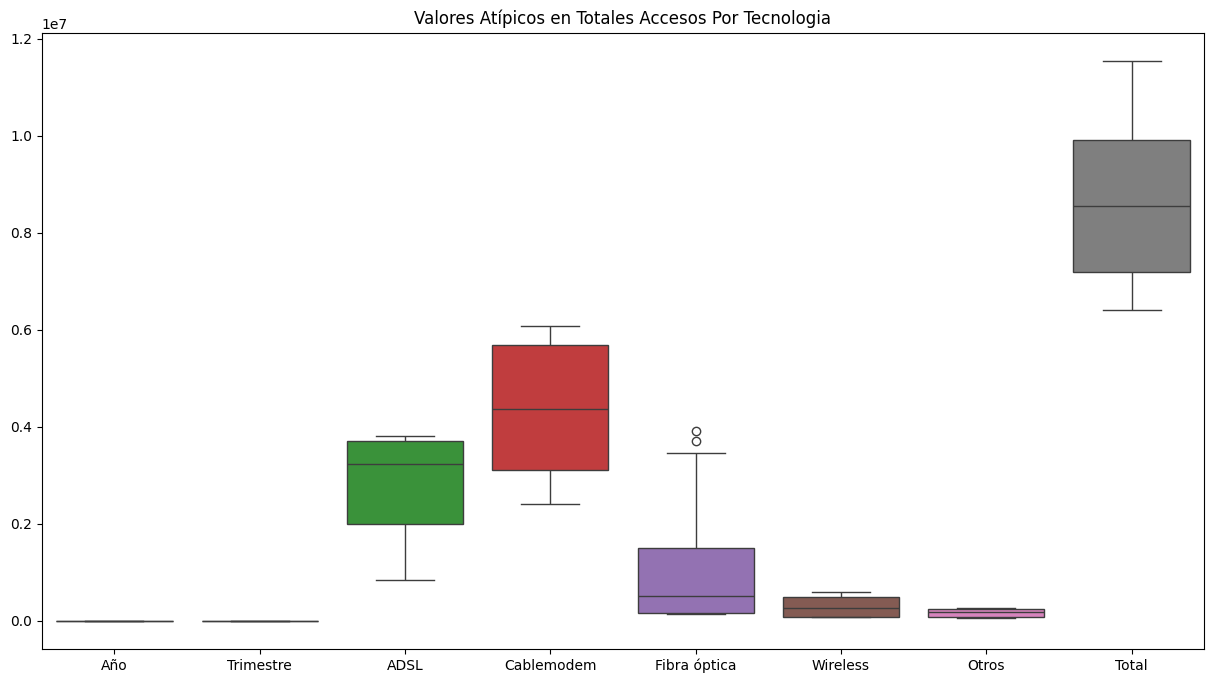

Valores atípicos en Accesos Por Tecnología:


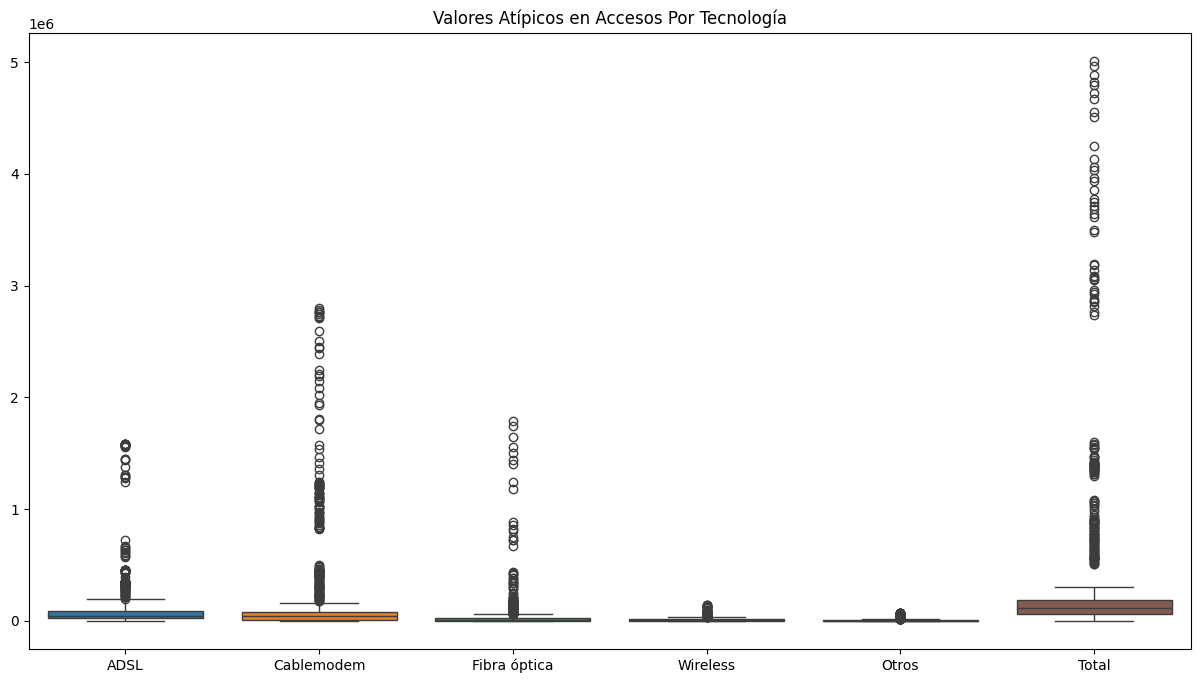

Valores atípicos en Dial-BAf:


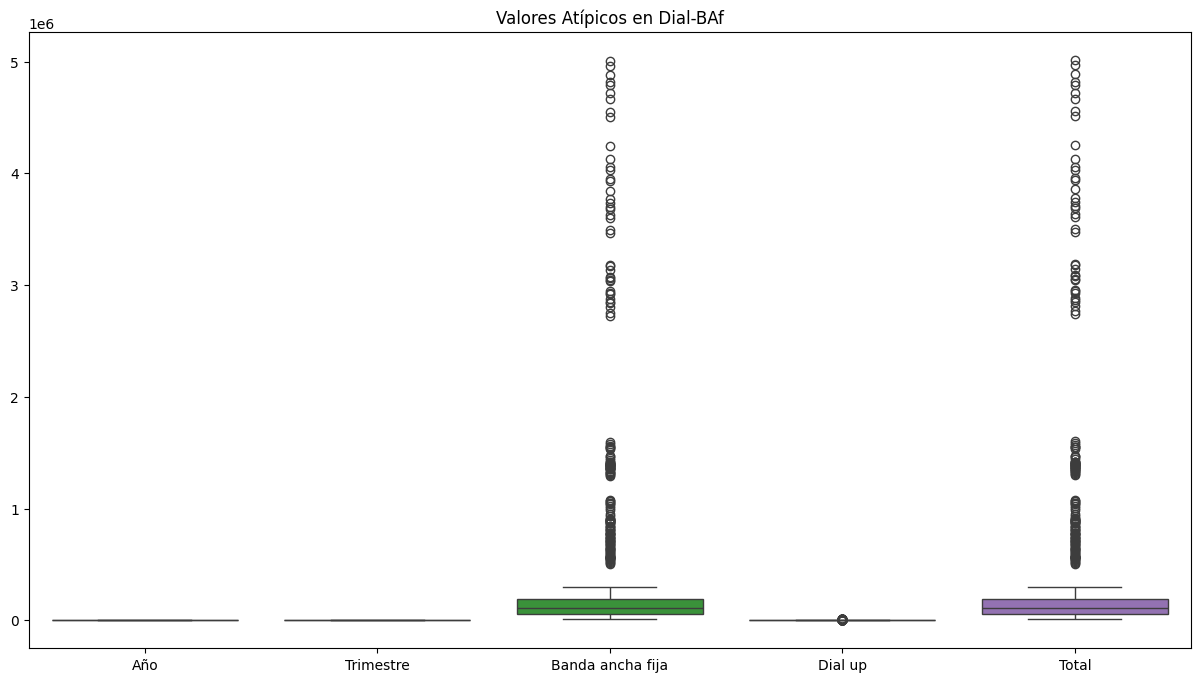

Valores atípicos en Totales Dial-BAf:


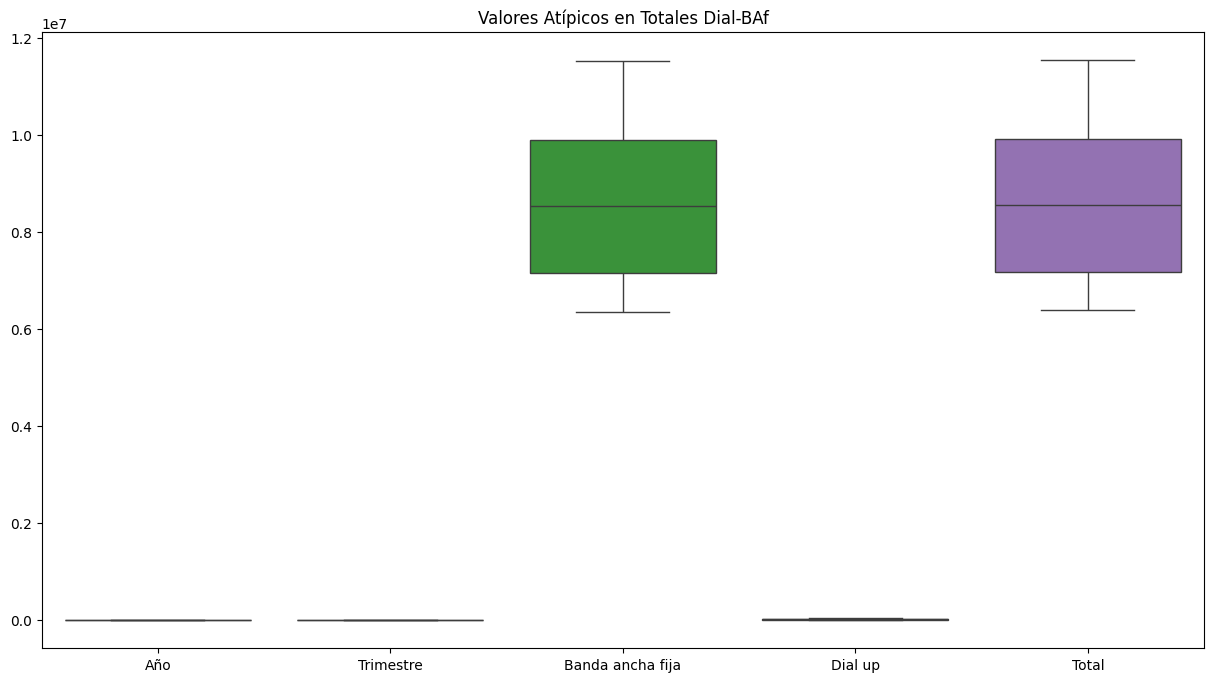

Valores atípicos en Penetración-poblacion:


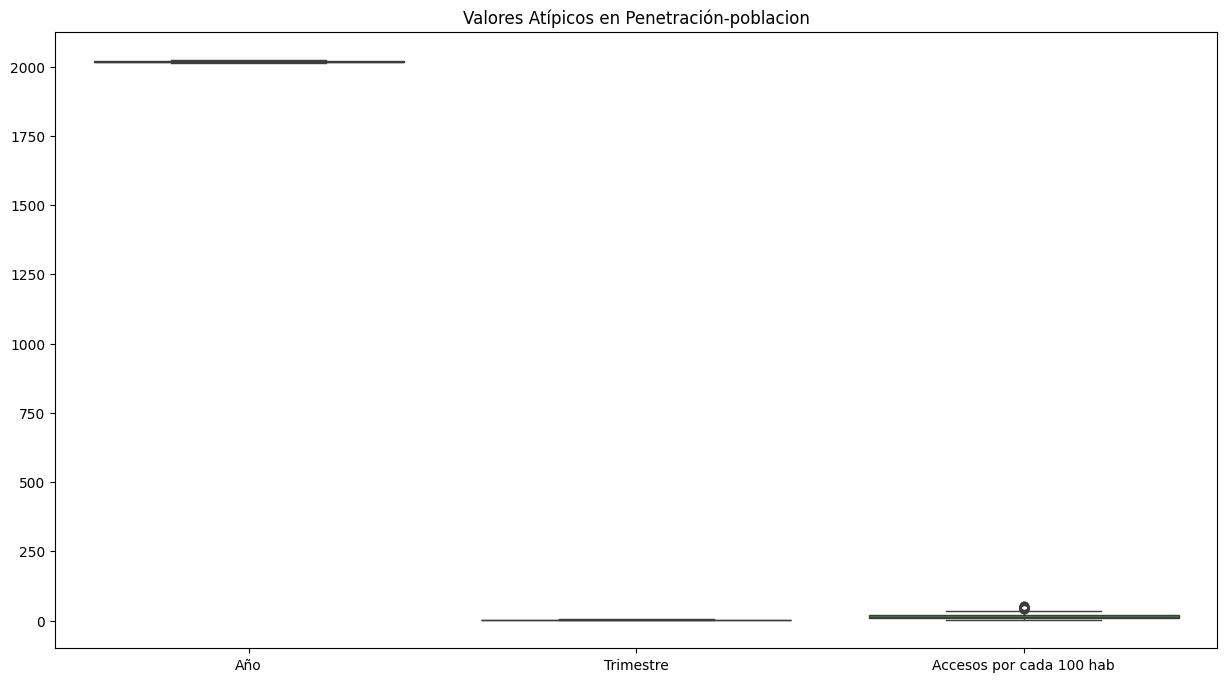

Valores atípicos en Penetracion-hogares:


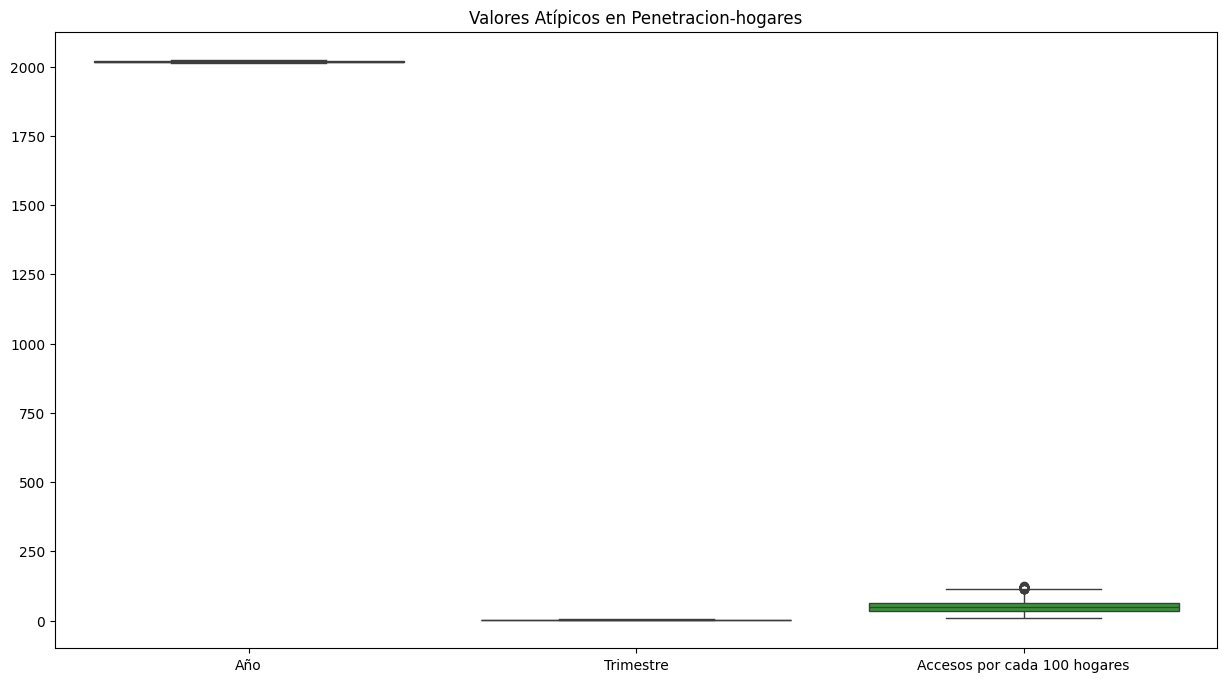

Valores atípicos en Penetracion-totales:


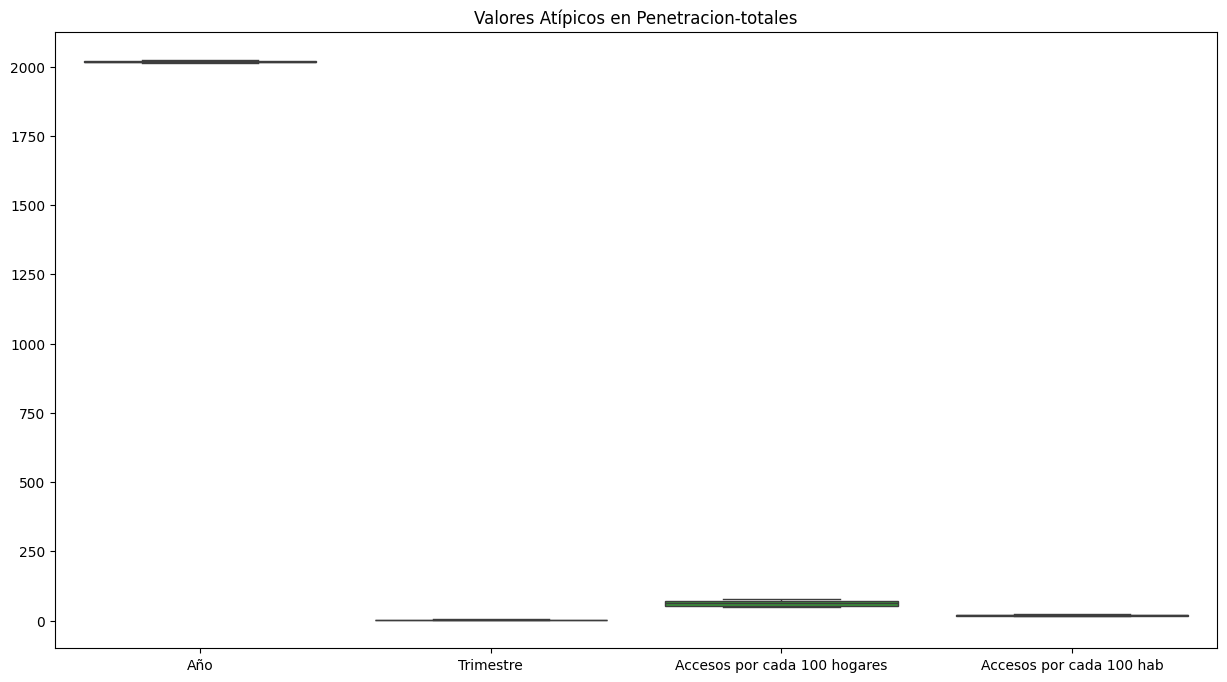

Valores atípicos en Totales Accesos por velocidad:


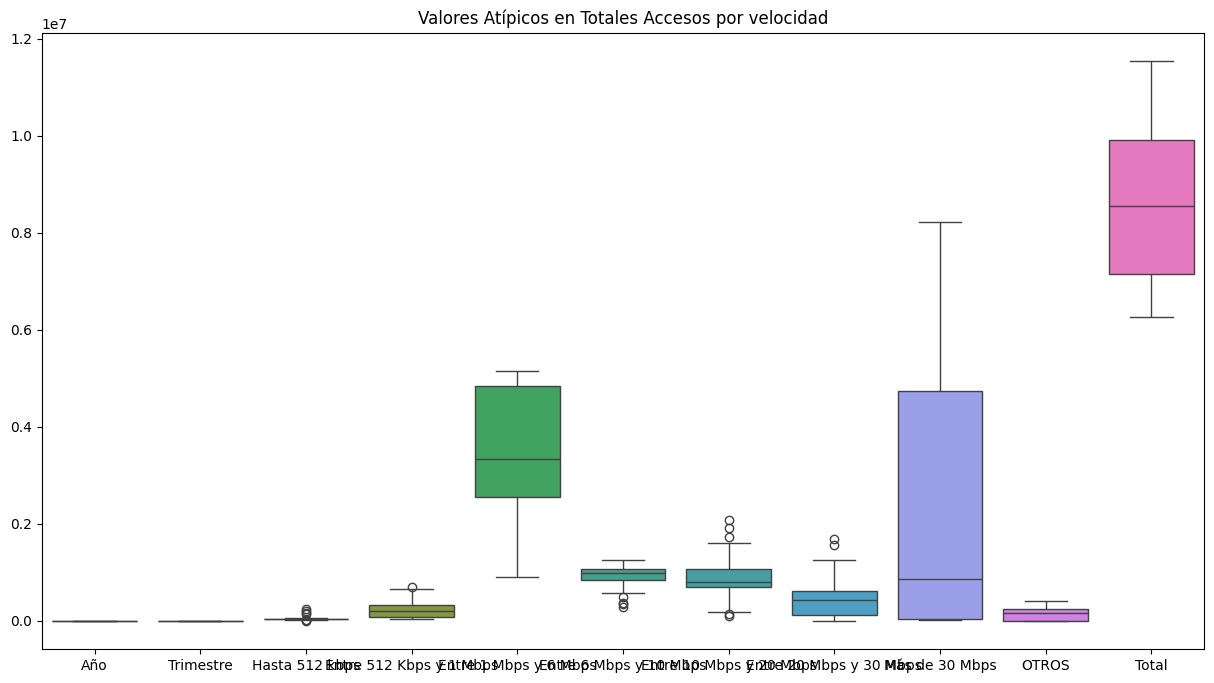

Valores atípicos en Accesos por velocidad:


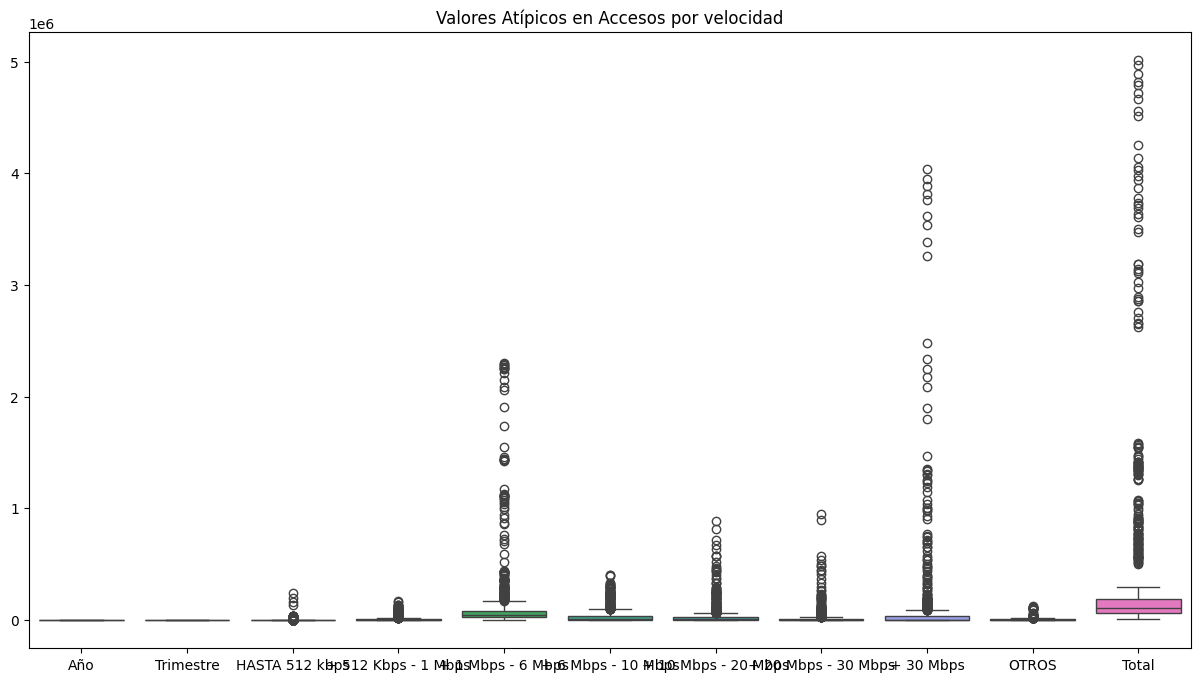

Valores atípicos en Ingresos:


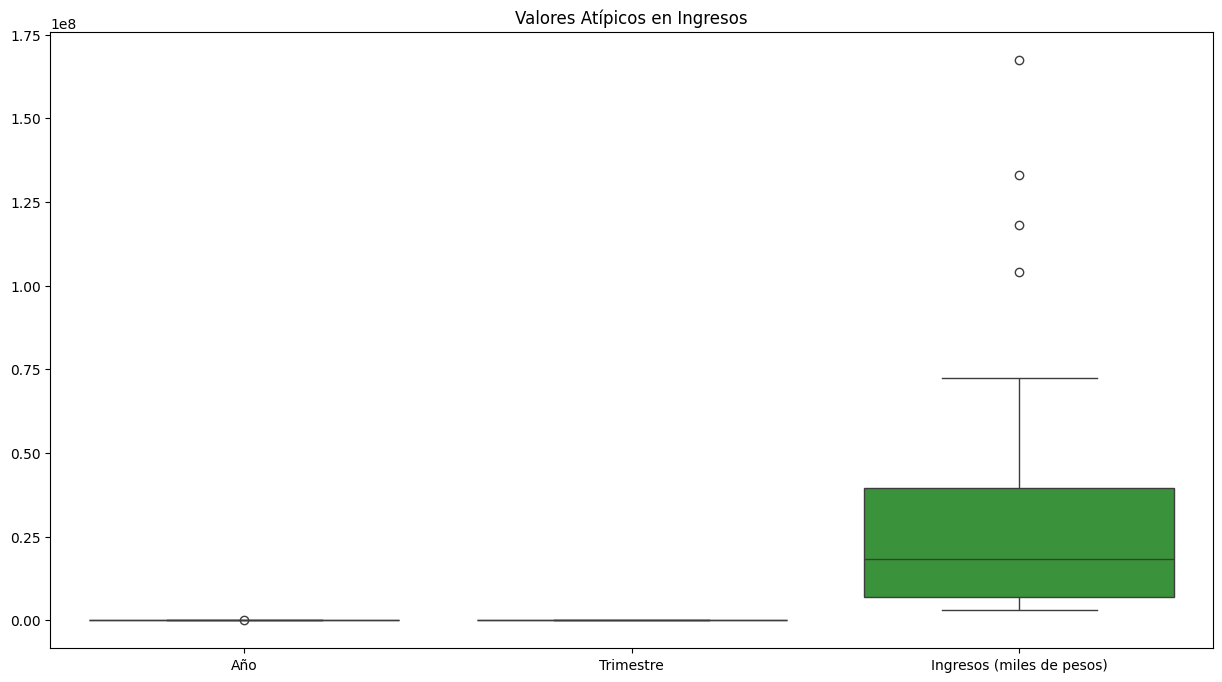

In [21]:
# Función para graficar boxplots y detectar valores atípicos
def graficar_boxplot(df, nombre_df):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']).dropna(), orient='v')
    plt.title(f'Valores Atípicos en {nombre_df}')
    plt.show()

# Graficar boxplots para todos los dataframes
for nombre_df, df in dataframes.items():
    print(f"Valores atípicos en {nombre_df}:")
    graficar_boxplot(df, nombre_df)

**Análisis:**

La identificación de valores atípicos y áreas con alta variabilidad en la penetración del servicio permite focalizar los recursos y esfuerzos en las provincias que más lo necesitan, mejorando la calidad del servicio y satisfaciendo mejor la demanda de los usuarios.

Para la empresa prestadora de servicios de telecomunicaciones, este análisis es fundamental para entender dónde se encuentran las mayores oportunidades de mejora y expansión.

| **Análisis** | **Descripción** |
|--------------|-----------------|
| **Valores atípicos en Acc_vel_loc_sinrangos** | Hay algunas localidades con accesos significativamente más altos o más bajos en ciertas velocidades de internet. |
| **Valores atípicos en Velocidad_sin_Rangos** | En particular, hay algunos puntos que alcanzan hasta 1.4 millones, lo cual es significativamente más alto que la mayoría de los datos. |
| **Valores atípicos en Velocidad % por prov** | Hay provincias con velocidades de bajada significativamente diferentes del resto, ya sea más altas o más bajas. |
| **Valores atípicos en Totales VMD** | Hay trimestres con velocidades de bajada significativamente diferentes del resto, ya sea más altas o más bajas. |
| **Valores atípicos en Accesos_tecnologia_localidad** | Se observan outliers significativos en CABLEMODEM, FIBRA OPTICA, WIRELESS y Total general, indicando que algunas localidades tienen un número muy alto de accesos en comparación con la mayoría de las localidades. |
| **Valores atípicos en Totales Accesos Por Tecnologia** | Se observan valores atípicos significativos en las categorías de Cablemodem y Fibra óptica, indicando que algunas localidades tienen un número muy alto de accesos en comparación con otras. |
| **Valores atípicos en Accesos Por Tecnología** | Se observan valores atípicos significativos en las categorías de ADSL, Cablemodem, y Fibra óptica, indicando que algunas localidades tienen un número muy alto de accesos en comparación con otras. |
| **Valores atípicos en Dial-BAf** | Se observan valores atípicos significativos en las categorías de Banda ancha fija y Total, sugiriendo que algunas localidades tienen un número muy alto de accesos en comparación con otras. |
| **Valores atípicos en Totales Dial-BAf** | No se observan valores atípicos en las categorías de Banda ancha fija y Total, sugiriendo que la variabilidad en el número de accesos es más controlada y no existen valores extremadamente alejados del resto de los datos. |
| **Valores atípicos en Penetración-poblacion** | Se observa un valor atípico en la categoría de Accesos por cada 100 habitantes, indicando que hay al menos una provincia con una penetración significativamente diferente del promedio nacional. |
| **Valores atípicos en Penetracion-hogares** | Se observa un valor atípico en la categoría de Accesos por cada 100 hogares, sugiriendo que hay al menos una provincia con una penetración significativamente diferente del promedio nacional. |
| **Valores atípicos en Penetracion-totales** | Accesos por cada 100 hogares y Accesos por cada 100 habitantes presentan outliers, indicando variabilidad en la penetración del servicio de internet en diferentes provincias. Estos outliers deben ser investigados para entender por qué algunas provincias tienen un acceso tan diferente al promedio. |
| **Valores atípicos en Totales Accesos por velocidad** | Se observan varios valores atípicos en las categorías de velocidad, especialmente en "Hasta 512 kbps", "Entre 1 Mbps y 6 Mbps", "Entre 6 Mbps y 10 Mbps", "Entre 10 Mbps y 20 Mbps", "Más de 30 Mbps" y "Total", sugiriendo gran variabilidad en la cantidad de accesos a internet en estas categorías de velocidad. |
| **Valores atípicos en Accesos por velocidad** | La mayoría de las categorías de velocidad presentan valores atípicos, sugiriendo provincias o periodos con una cantidad de accesos significativamente diferente al promedio. |
| **Valores atípicos en Ingresos** | Los ingresos presentan varios valores atípicos, sugiriendo trimestres con ingresos significativamente mayores en comparación con otros. |


## 4. ANALISIS DE REGISTROS DUPLICADOS

In [22]:
# Función para buscar registros duplicados en un dataframe
def buscar_duplicados(df, nombre_df):
    duplicados = df.duplicated().sum()
    print(f"Registros duplicados en {nombre_df}: {duplicados}")

# Buscar registros duplicados en todos los dataframes
for nombre_df, df in dataframes.items():
    buscar_duplicados(df, nombre_df)

Registros duplicados en Acc_vel_loc_sinrangos: 0
Registros duplicados en Velocidad_sin_Rangos: 0
Registros duplicados en Velocidad % por prov: 0
Registros duplicados en Totales VMD: 0
Registros duplicados en Accesos_tecnologia_localidad: 0
Registros duplicados en Totales Accesos Por Tecnologia: 0
Registros duplicados en Accesos Por Tecnología: 0
Registros duplicados en Dial-BAf: 0
Registros duplicados en Totales Dial-BAf: 0
Registros duplicados en Penetración-poblacion: 0
Registros duplicados en Penetracion-hogares: 0
Registros duplicados en Penetracion-totales: 0
Registros duplicados en Totales Accesos por velocidad: 0
Registros duplicados en Accesos por velocidad: 0
Registros duplicados en Ingresos: 0


## 5. ANALISIS EXPLORATORIO GEOESPACIAL

Utilización de mapas para visualizar la distribución de accesos a internet en las provincias.

In [23]:
import geopandas as gpd

# Cargar un mapa de Argentina (Shapefile de Argentina)
gdf = gpd.read_file('../Datasets/Shapefiles/provincia.zip')

In [24]:
gdf

,gid,entidad,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,3,0,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,4,0,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,5,0,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."
5,6,0,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."
6,7,0,Provincia de Tucumán,Provincia,Tucumán,90,Geografía,IGN,"POLYGON ((-65.35915 -26.05944, -65.35868 -26.0..."
7,8,0,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1..."
8,9,0,Provincia de Formosa,Provincia,Formosa,34,Geografía,IGN,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4..."
9,10,0,Provincia de Santa Cruz,Provincia,Santa Cruz,78,Geografía,IGN,"MULTIPOLYGON (((-67.59361 -46.01744, -67.59357..."


In [25]:
# Cargar datos para el mapa de conectividad del archivo Excel
mapa_conectividad_path = '../Datasets/mapa_conectividad.xlsx'
mapa_conectividad_xls = pd.ExcelFile(mapa_conectividad_path)

In [26]:
# Cargar hoja en un dataframe
mapa_conectividad = pd.read_excel(mapa_conectividad_xls, sheet_name='Hoja3')

In [27]:
# Convertir las columnas 'Latitud' y 'Longitud' a valores numéricos, manejando errores
mapa_conectividad['Longitud'] = pd.to_numeric(mapa_conectividad['Longitud'], errors='coerce')
mapa_conectividad['Latitud'] = pd.to_numeric(mapa_conectividad['Latitud'], errors='coerce')

In [28]:
# Filtrar los datos para mantener solo los puntos válidos
map_data = mapa_conectividad.dropna(subset=['Longitud', 'Latitud'])

In [29]:
# Crear el GeoDataFrame con geometría a partir de 'Longitud' y 'Latitud'
geometry = gpd.points_from_xy(map_data['Longitud'], map_data['Latitud'])
geo_df = gpd.GeoDataFrame(map_data, geometry=geometry)

In [30]:
# Definir explícitamente el CRS original de 'geo_df' (suponiendo que es WGS 84)
geo_df.set_crs(epsg=4326, inplace=True)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud,geometry
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,Sí,--,--,--,--,--,Sí,Sí,Sí,6588010.0,-35.292982,-61.407254,POINT (-61.40725 -35.29298)
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,Sí,Sí,Sí,6588020.0,-35.239499,-60.825136,POINT (-60.82514 -35.23950)
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,Sí,--,--,Sí,Sí,Sí,Sí,6588040.0,-35.651193,-60.709896,POINT (-60.70990 -35.65119)
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,Sí,6588050.0,-35.407947,-61.210567,POINT (-61.21057 -35.40795)
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,Sí,--,--,Sí,--,--,Sí,Sí,Sí,6588060.0,-35.520141,-60.998949,POINT (-60.99895 -35.52014)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,SANTA FE,Castellanos,Virginia,151,--,--,--,--,--,Sí,--,--,--,6638040.0,-30.740253,-61.340967,POINT (-61.34097 -30.74025)
4307,SANTA FE,Castellanos,Zenón Pereyra,1637,--,Sí,--,--,--,--,--,Sí,Sí,6638040.0,-31.564397,-61.898425,POINT (-61.89843 -31.56440)
4308,SANTA FE,Constitución,Alcorta,7450,Sí,Sí,--,Sí,--,Sí,Sí,Sí,Sí,6638040.0,-33.540198,-61.124634,POINT (-61.12463 -33.54020)
4309,SANTA FE,Constitución,Barrio Arroyo del Medio,310,--,--,--,--,--,--,--,--,--,6638040.0,-33.286067,-60.272098,POINT (-60.27210 -33.28607)


In [31]:
# Reproyectar el GeoDataFrame de accesos a internet al CRS del shapefile de Provincias
geo_df = geo_df.to_crs(gdf.crs)

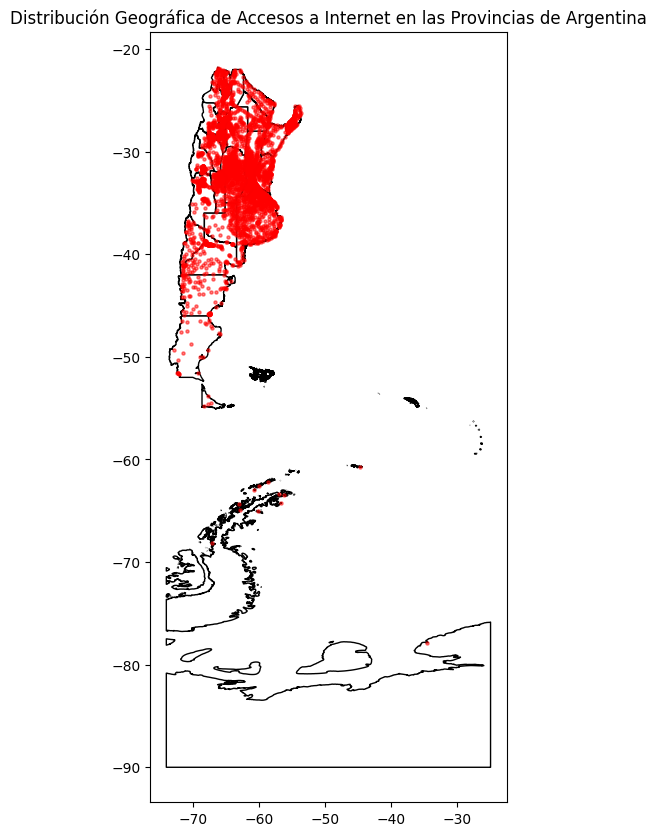

In [32]:
# Plotear el mapa de Provincias con los accesos a internet
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, color='red', alpha=0.5, markersize=5)
plt.title('Distribución Geográfica de Accesos a Internet en las Provincias de Argentina')
plt.show()

**Análisis de la Distribución Geográfica de Accesos a Internet en las Provincias de Argentina:**

- Región Centro-Norte: La alta concentración de puntos en provincias como Buenos Aires, Córdoba, Santa Fe y el norte de Argentina indica que estas regiones tienen un mejor acceso a internet. Esto podría estar correlacionado con el desarrollo económico y la infraestructura tecnológica avanzada en estas áreas.

- Región Sur (Patagonia): La menor densidad de puntos en provincias como Chubut, Santa Cruz y Tierra del Fuego sugiere desafíos significativos en la conectividad a internet. Las características geográficas y la baja densidad poblacional pueden ser factores contribuyentes.

- Capital Federal: Muestra una alta densidad de puntos, lo que refleja el alto nivel de conectividad en esta área urbana. Este acceso masivo a internet facilita el desarrollo económico, educativo y social en la región.

## 6. ANALISIS EXPLORATORIO POR VELOCIDAD

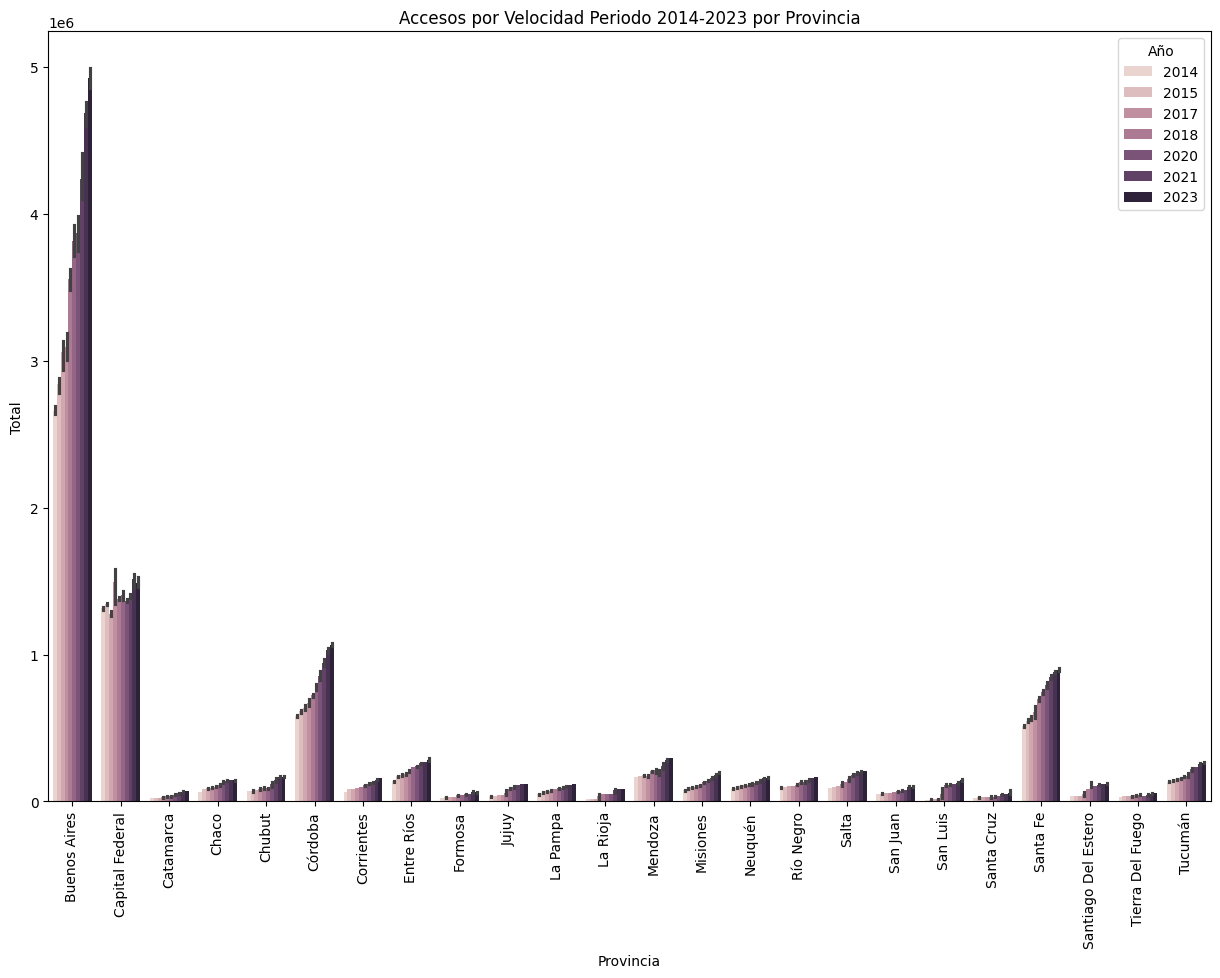

In [33]:
# Cambiar los valores de 2024 a 2023 en la columna Año
df_accesos_por_velocidad['Año'] = df_accesos_por_velocidad['Año'].replace(2024, 2023)

# Visualización de accesos por velocidad para las provincias en el período 2014-2023
plt.figure(figsize=(15, 10))
sns.barplot(data=df_accesos_por_velocidad, x='Provincia', y='Total', hue='Año')
plt.title('Accesos por Velocidad Periodo 2014-2023 por Provincia')
plt.xticks(rotation=90)
plt.show()


**Análisis:**

- Buenos Aires y Capital Federal son las provincias con el mayor número de accesos a internet a lo largo de los años. Esto es consistente con la densidad de población y el desarrollo urbano en estas áreas.

- Provincias como Córdoba, Santa Fe, y Mendoza también muestran un número significativo de accesos, lo que indica un buen nivel de conectividad.

- Se observa que en algunas provincias, como Buenos Aires y Capital Federal, el crecimiento es más pronunciado, mientras que en otras provincias el crecimiento es más gradual.

- Provincias más pequeñas o menos urbanizadas, como Formosa, La Pampa, y La Rioja, muestran un menor número de accesos en comparación con las provincias más grandes y desarrolladas.

- Existen diferencias significativas en el número de accesos a internet entre las distintas provincias, lo que refleja disparidades en infraestructura y penetración del servicio.

## 7. ANALISIS EXPLORATORIO POR TECNOLOGIA

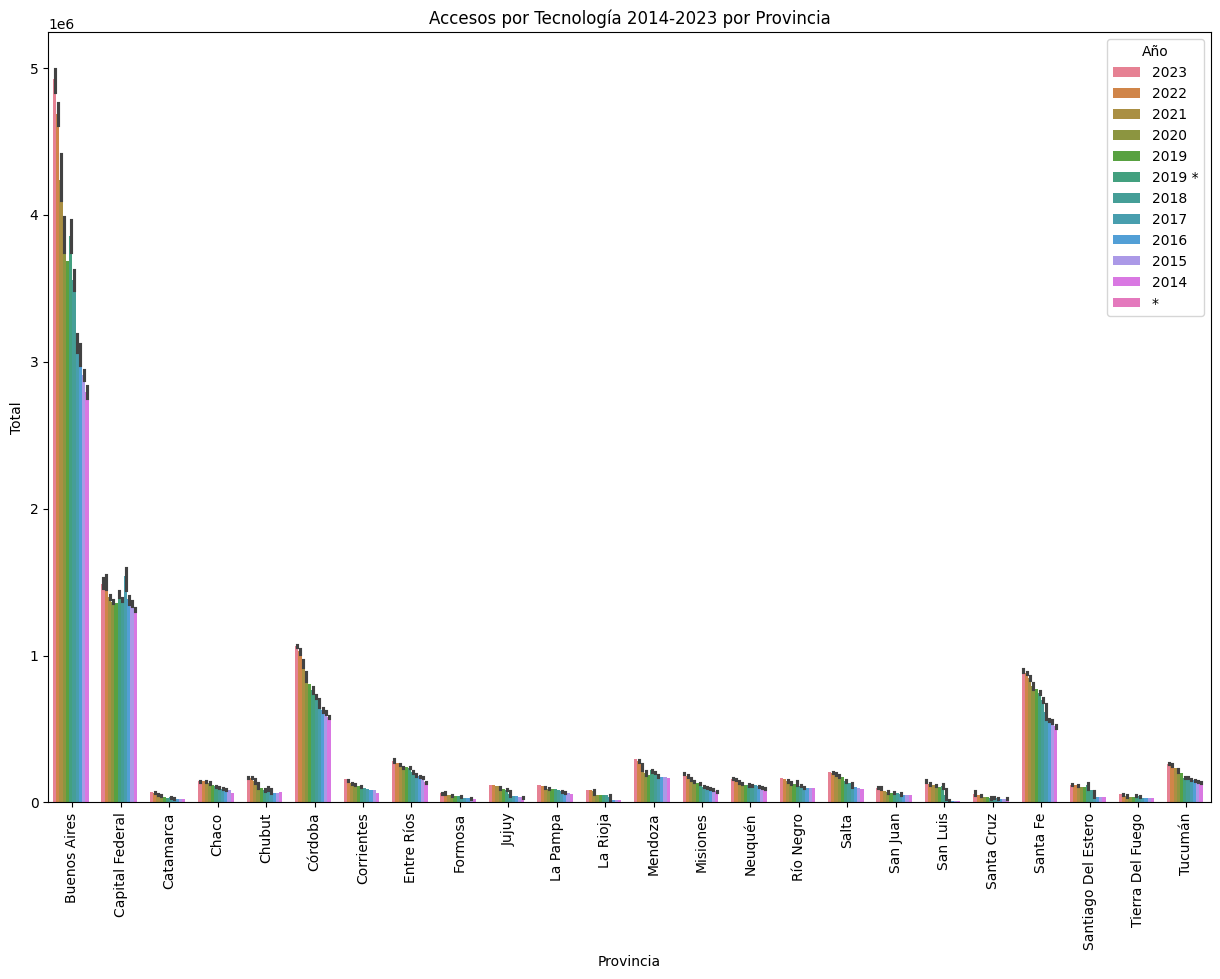

In [34]:
# Visualización de accesos por tecnología para las provincias en 2014-2023
plt.figure(figsize=(15, 10))
sns.barplot(data=df_accesos_por_tecnologia, x='Provincia', y='Total', hue='Año')
plt.title('Accesos por Tecnología 2014-2023 por Provincia')
plt.xticks(rotation=90)
plt.show()

**Análisis:**

- Este análisis es crucial para la empresa de telecomunicaciones, ya que permite identificar áreas con alto potencial de crecimiento y regiones donde la infraestructura puede necesitar mejoras.

- Al igual que en el gráfico anterior, Buenos Aires y Capital Federal lideran en el número total de accesos, reflejando su alta densidad de población y desarrollo tecnológico. Otras provincias como Córdoba, Santa Fe, y Mendoza también muestran un número significativo de accesos. 

- Las provincias con menor penetración de tecnologías avanzadas representan una oportunidad para la expansión de servicios. La empresa puede enfocar sus recursos en las provincias con mayor demanda de tecnologías avanzadas y planificar estrategias de expansión en las áreas con menor penetración para equilibrar la conectividad a nivel nacional.

## 8. ANALISIS DE INGRESOS

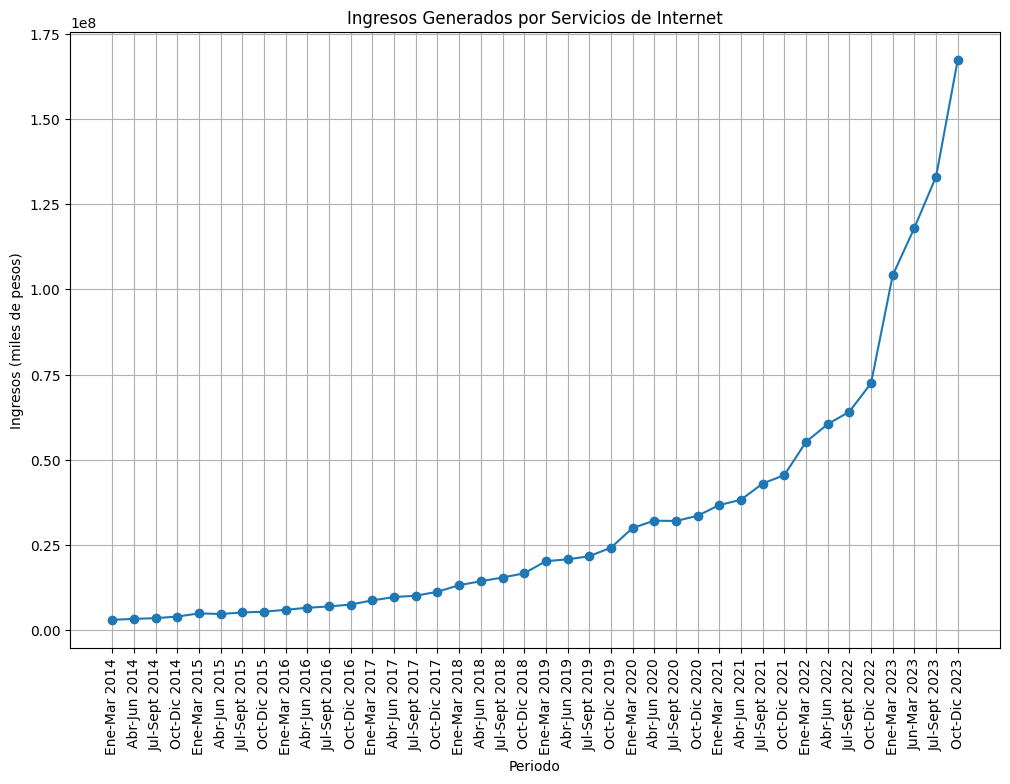

In [35]:
# Invertir el orden del dataframe
df_ingresos_invertido = df_ingresos.iloc[::-1]

# Crear la gráfica con el dataframe invertido
plt.figure(figsize=(12, 8))
plt.plot(df_ingresos_invertido['Periodo'], df_ingresos_invertido['Ingresos (miles de pesos)'], marker='o')
plt.title('Ingresos Generados por Servicios de Internet')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.show()


**Análisis:**

- Los ingresos generados por los servicios de Internet muestran una clara tendencia ascendente a lo largo del periodo analizado. Esto indica un crecimiento continuo y sostenido en la industria de las telecomunicaciones en Argentina.

- Se observa un incremento más pronunciado en los ingresos a partir del año 2020. Esto podría deberse a varios factores, como un aumento en la demanda de servicios de Internet debido a la pandemia de COVID-19, que obligó a muchas personas a trabajar y estudiar desde casa.

- Este crecimiento sugiere que la demanda de servicios de Internet está en auge,

## CONCLUSIONES

En este análisis exploratorio de datos, hemos examinado diversas dimensiones de los datos de acceso a internet en Argentina. Se han identificado patrones en los accesos por velocidad y tecnología, así como en los ingresos generados a lo largo del tiempo. Además, se ha llevado a cabo una búsqueda de valores faltantes, valores atípicos y registros duplicados. Estos hallazgos proporcionan una base sólida para futuras decisiones estratégicas y análisis más detallados.
